In [1]:

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'  #%%
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import matplotlib

plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'

In [2]:
results_path = "/Volumes/noamaz/modularity/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/all_togther"

In [3]:
task = "retina_xor"
num_layers = '3'
retina_res_folder = f"{task}/retina_{num_layers}_layers"
retina_lgb_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/exp_2023-11-27-15-51-15_nice_features"

task = "xor"
num_layers = "4"
xor_res_folder = f"{task}/{task}_{num_layers}_layers"
xor_lgb_res_path = f"{results_path}/{xor_res_folder}/lightgbm_feature_selection/exp_2023-11-16-17-38-02_nice_features"

task = "digits"
num_layers = '3'
digit_res_folder = f"{task}/digits_{num_layers}_layers"
digit_lgb_res_path = f"{results_path}/{digit_res_folder}/lightgbm_feature_selection/exp_2023_11_27_11_00_0_nice_features"


In [4]:
paths = [
    digit_lgb_res_path,
    xor_lgb_res_path,
    retina_lgb_res_path,
]
num_features = [
    3,
    5,
    6,
]
all_features = []
for loc, t, in zip(paths, num_features):
    all_features.append(pd.read_csv(f"{loc}/{t}_feature_values.csv").drop("Unnamed: 0", axis=1))

In [5]:
all_features[0]

max_possible_connections  total_connectivity_ratio_between_layers_2  \
0                         368.0                                       0.36   
1                         633.0                                       0.70   
2                         680.0                                       0.50   
3                         480.0                                       0.17   
4                         584.0                                       0.78   
...                         ...                                        ...   
96721                     480.0                                       0.37   
96722                     309.0                                       0.20   
96723                     425.0                                       0.14   
96724                     584.0                                       0.90   
96725                     368.0                                       0.49   

       motifs_count_1     label  
0               324.0  0.619331  
1              1124.0  0.712656  
2               436.0  0.402813  
3               135.0  0.371625  
4              1833.0  0.826351  
...               ...       ...  
96721           569.0  0.724791  
96722           222.0  0.416620  
96723           135.0  0.401476  
96724          2192.0  0.828459  
96725           547.0  0.726063  

[96726 rows x 4 columns]

In [6]:
all_features_names = []
for i in all_features:
    a = list(i.columns)
    a.remove('label')
    sorted(a)
    all_features_names.append(a)
all_features_names = [
    {
        'max_possible_connections': 'Maximum possible synapses in the network',
        'total_connectivity_ratio_between_layers_2': 'Density between layers 3-4',
        'motifs_count_1': "Number of type I motifs",
    },
    {
        'max_possible_connections': 'Maximum possible synapses in the network',
        'total_connectivity_ratio_between_layers_0': 'Density between layers 1-2',
        'motifs_count_1': "Number of type I motifs",
        'motifs_count_0': "Number of type III motifs",
        'dimensions_1': "Number of neurons in layer 2",
    },
    {
        'max_possible_connections': 'Maximum possible synapses in the network',
        'num_connections': "Number of synapses in the network",
        'num_paths_to_output_per_input_neuron_(0_ 0)': f"Input neuron’s 0 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 2)': f"Input neuron’s 2 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 3)': f"Input neuron’s 3 number of paths to the output",
        'num_paths_to_output_per_input_neuron_(0_ 5)': f"Input neuron’s 5 number of paths to the output",
    },
]


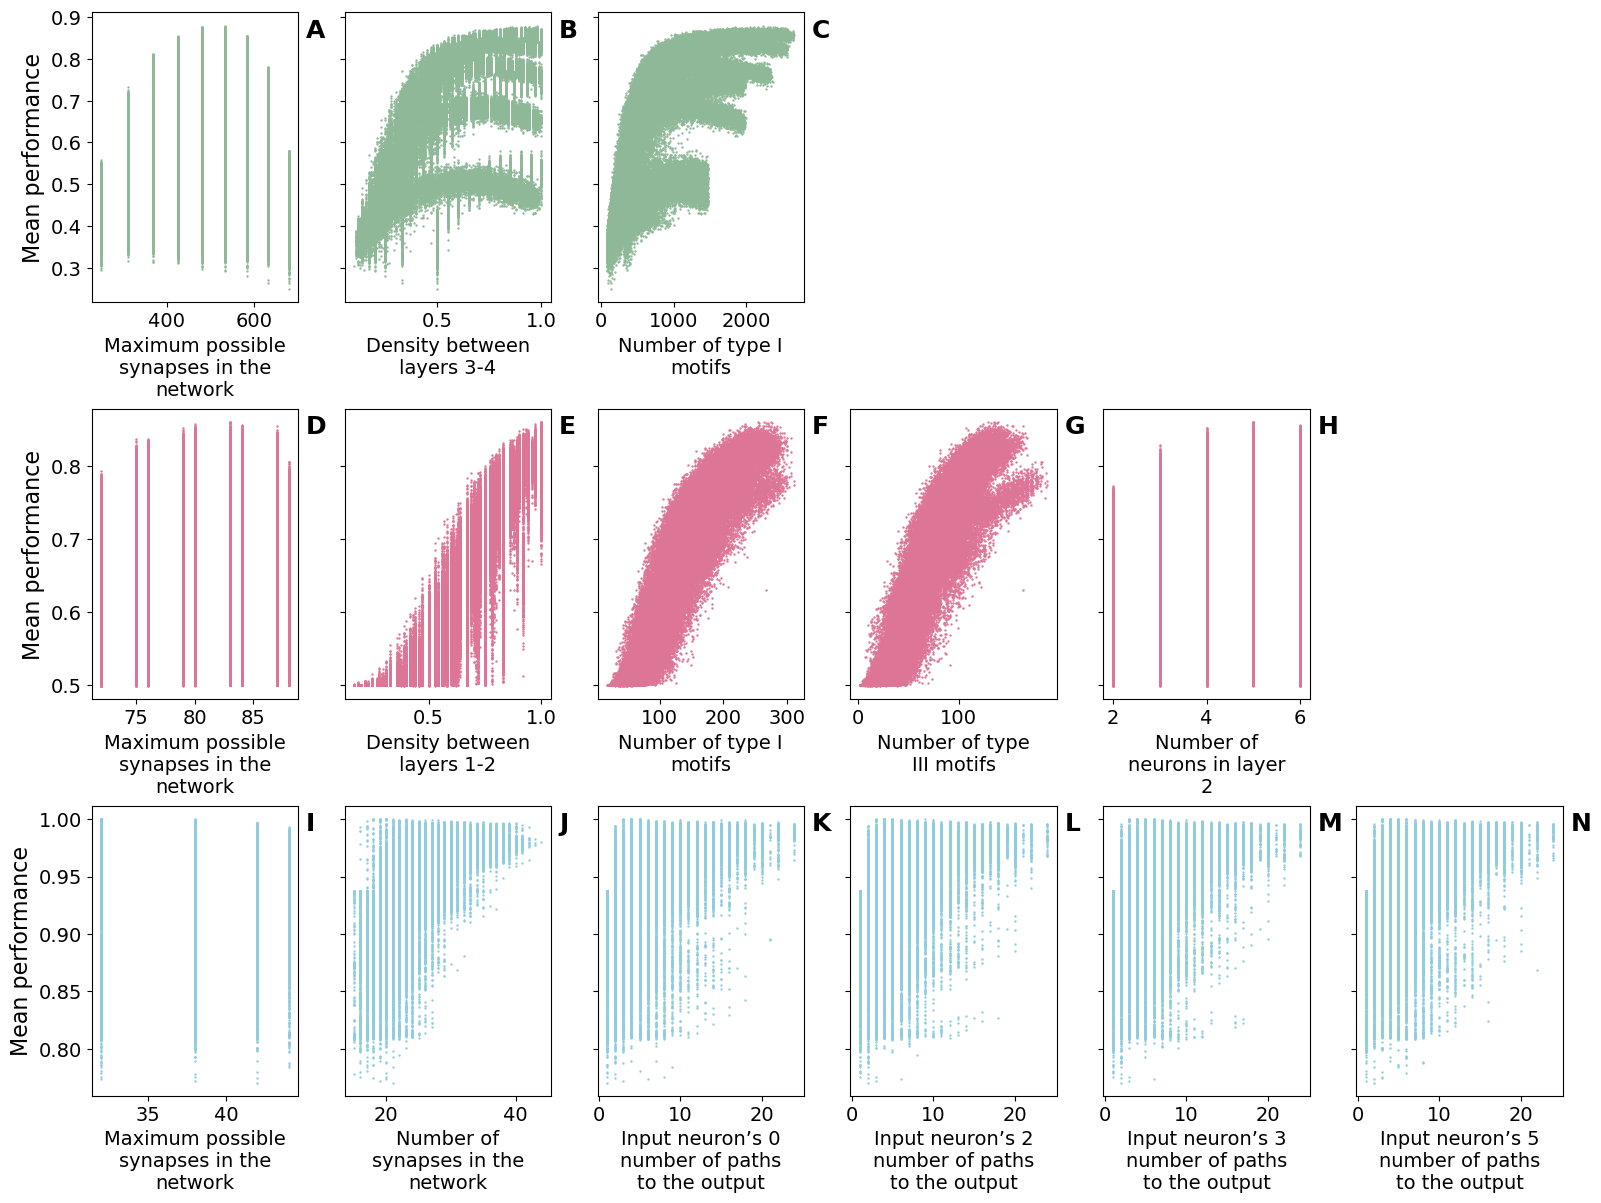

In [7]:
fig, axs = plt.subplots(3, 6, figsize=(16, 12), sharey='row', )
ind_r, ind_c = axs.shape
cs = [
    COLORS[3], COLORS[2], "#8ECDDD"
]
nums = [['A', 'B', 'C'], ['D', 'E', 'F', 'G', 'H'], ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], ]
tasks = ['Digit recognition', 'XOR', 'Retina']
for i in range(ind_r):
    features = list(all_features_names[i].keys())
    for j in range(ind_c):
        if len(all_features_names[i]) <= j:
            axs[i, j].axis('off')
            continue
        feature_name = features[j]
        x_data = all_features[i][feature_name]
        feature_name = all_features_names[i][feature_name]
        axs[i, j].scatter(x_data, all_features[i]['label'], c=cs[i], s=0.5)
        axs[i, j].set_xlabel(textwrap.fill(feature_name.replace('_', ' '), width=16,
                                           break_long_words=False), fontsize=14)
        axs[i, j].text(1.04, 0.98, nums[i][j], transform=axs[i, j].transAxes, fontsize=18, verticalalignment='top',
                       weight="bold")
        axs[i, j].tick_params(axis='both', labelsize=14)
    axs[i, 0].set_ylabel(f'Mean performance', fontsize=16)
#fig.suptitle('The chosen structural features’ distribution', y=0.99, fontsize=16)
fig.tight_layout(pad=0.7)

plt.savefig(
    f"{plot_path}/{time_str}_all_features_values_.png", bbox_inches='tight')

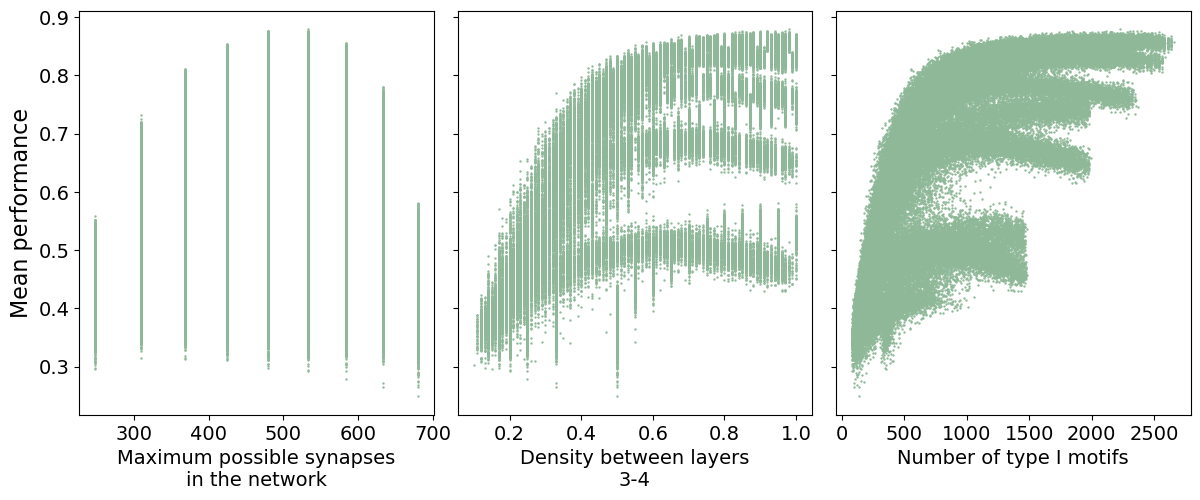

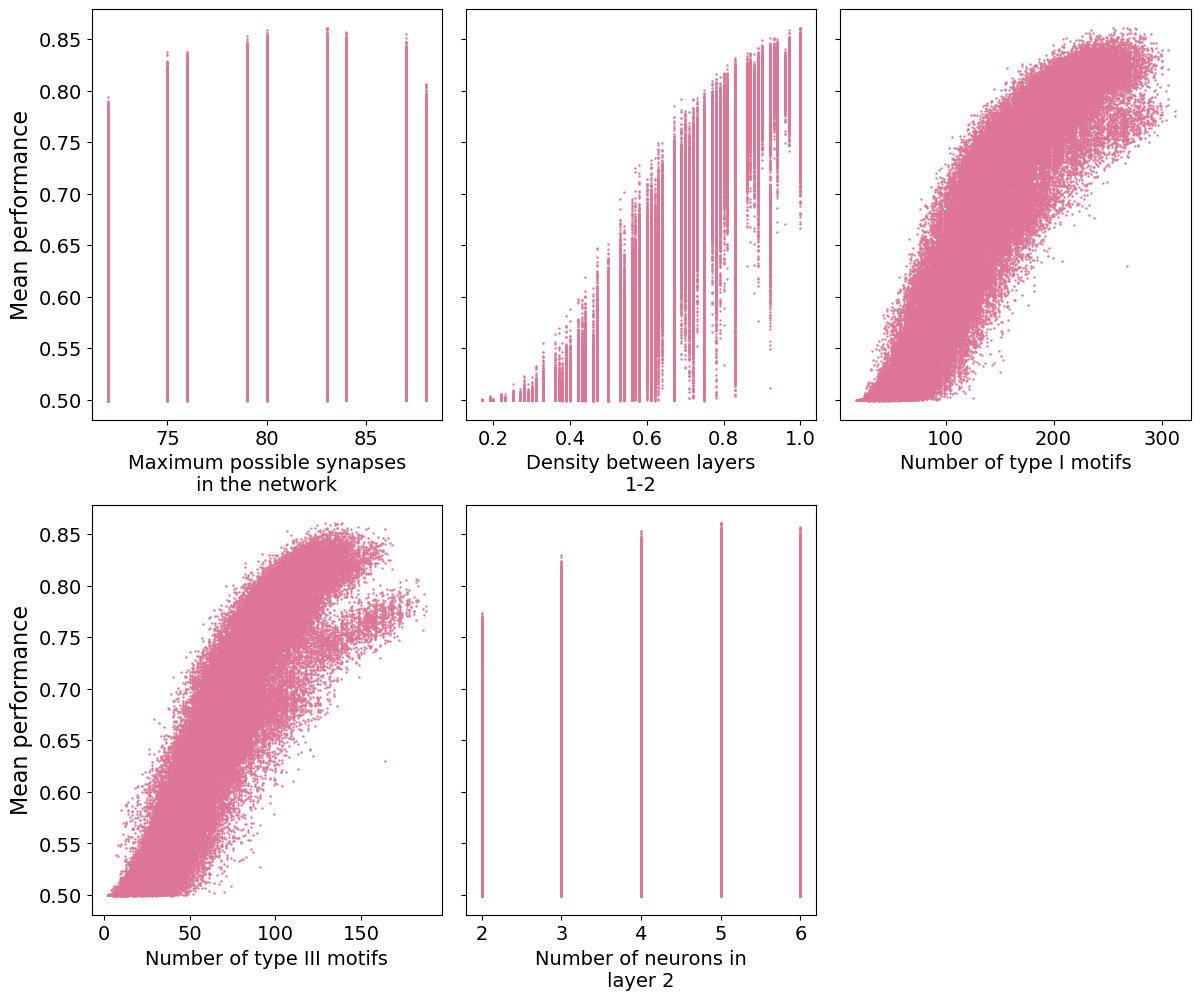

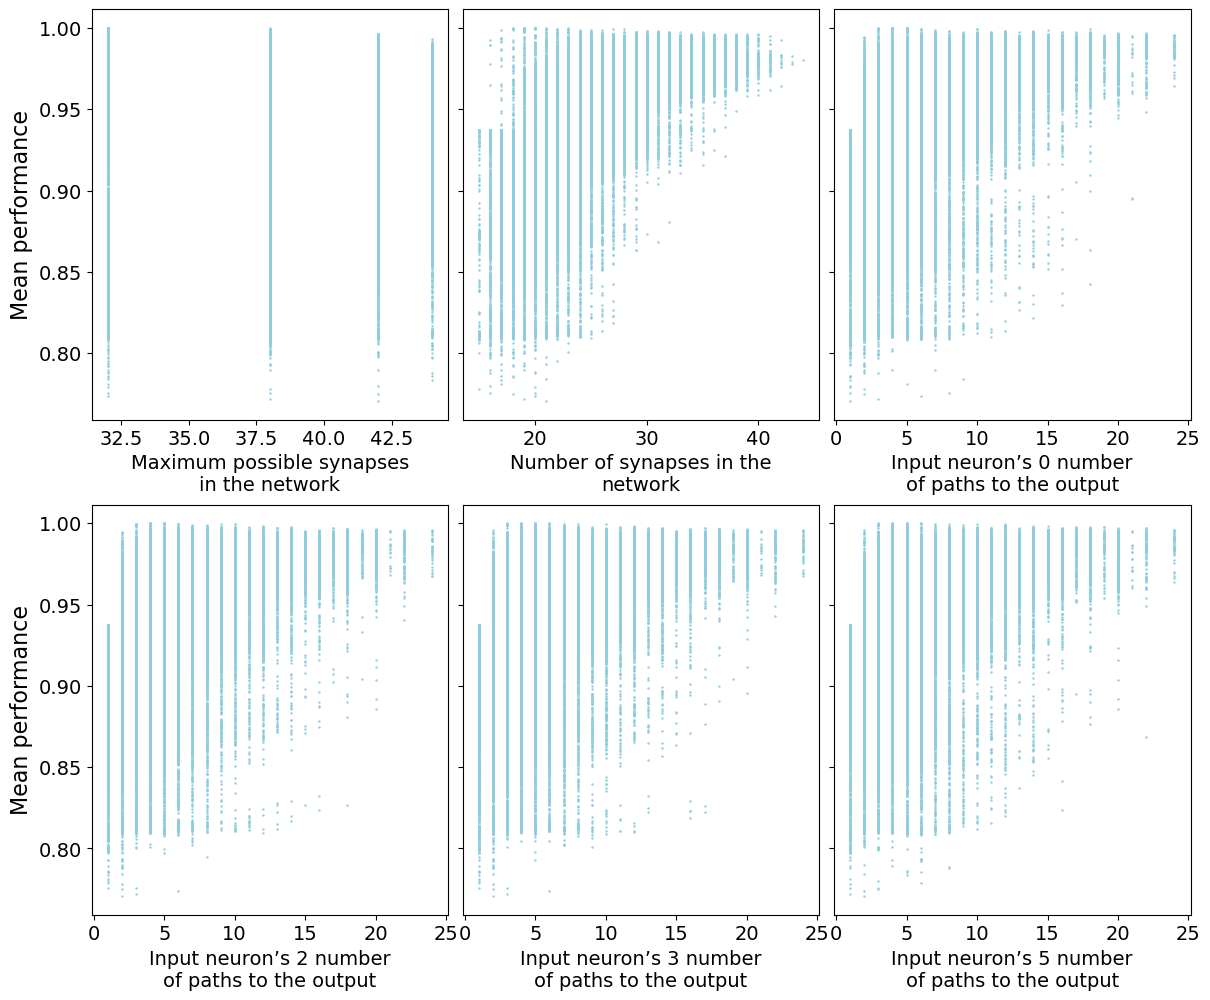

In [8]:
import numpy as np

cs = [
    COLORS[3], COLORS[2], "#8ECDDD"
]
nums = [['A', 'B', 'C'], ['D', 'E', 'F', 'G', 'H'], ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], ]
tasks = ['Digit recognition', 'XOR', 'Retina']
for i in range(len(tasks)):
    features = list(all_features_names[i].keys())
    ind_c = int(np.ceil(len(features) / 3))
    fig, axs = plt.subplots(ind_c, 3, figsize=(12, 5 * ind_c), sharey='all', )
    t = 0
    for j in range(ind_c):
        for k in range(3):
            if ind_c == 1:
                ind = k
                axs[0].set_ylabel(f'Mean performance', fontsize=16)
            else:
                ind = (j, k)
                axs[j, 0].set_ylabel(f'Mean performance', fontsize=16)
            if len(features) <= t:
                axs[j, k].axis('off')
                continue
            feature_name = features[t]
            x_data = all_features[i][feature_name]
            feature_name = all_features_names[i][feature_name]
            axs[ind].scatter(x_data, all_features[i]['label'], c=cs[i], s=0.5)
            axs[ind].set_xlabel(textwrap.fill(feature_name.replace('_', ' '), width=25,
                                              break_long_words=False), fontsize=14)
            axs[ind].tick_params(axis='both', labelsize=14)
            t += 1
    #fig.suptitle('The chosen structural features’ distribution', y=0.99, fontsize=16)
    fig.tight_layout(pad=0.7)

    plt.savefig(
        f"{plot_path}/{time_str}_{tasks[i]}_features_values_.png", bbox_inches='tight')

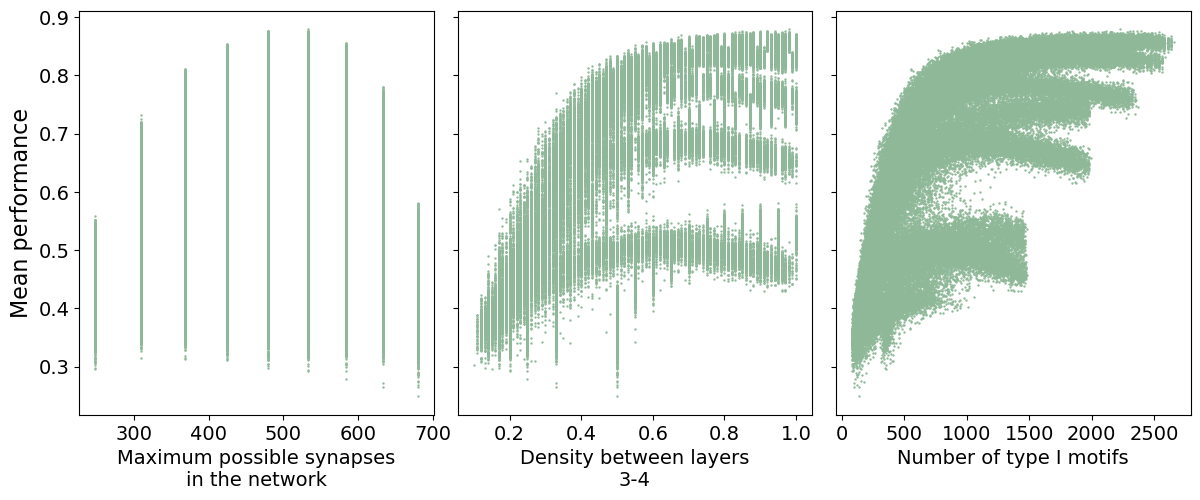

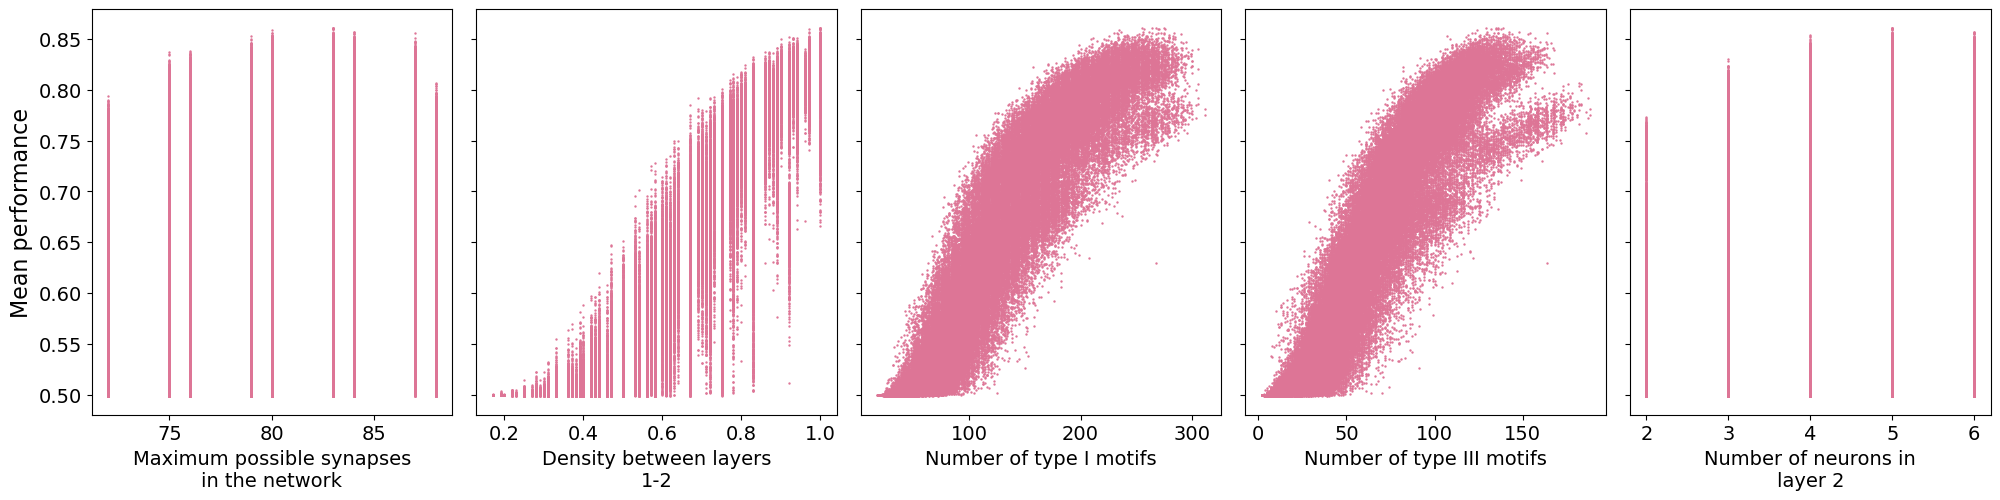

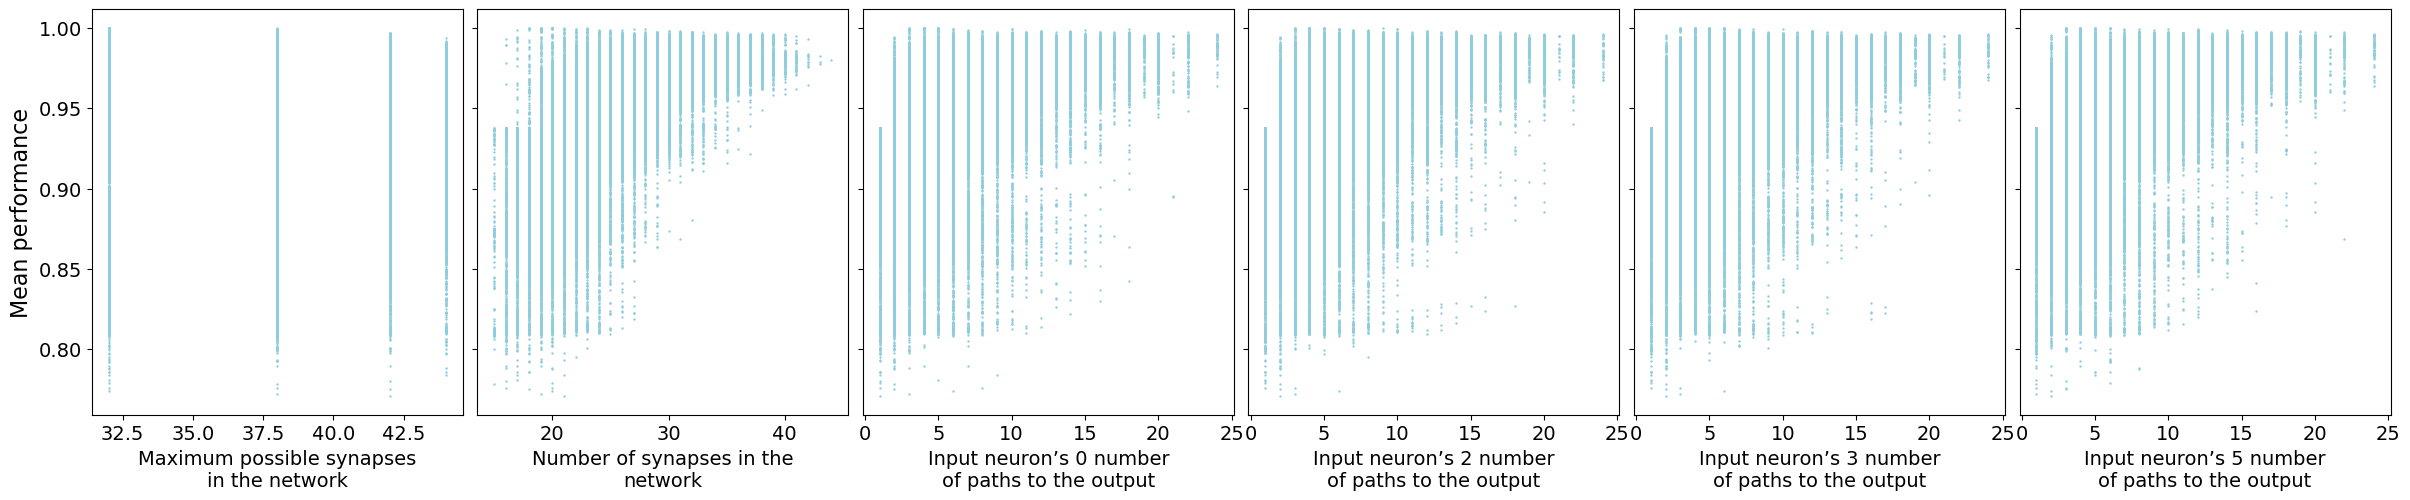

In [38]:
import numpy as np

cs = [
    COLORS[3], COLORS[2], "#8ECDDD"
]
nums = [['A', 'B', 'C'], ['D', 'E', 'F', 'G', 'H'], ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], ]
tasks = ['Digit recognition', 'XOR', 'Retina']
for i in range(len(tasks)):
    features = list(all_features_names[i].keys())
    ind_c = int(np.ceil(len(features) / 3))
    fig, axs = plt.subplots(1, len(features), figsize=(4 * len(features), 5), sharey='all', )
    t = 0
    for j in range(len(features)):
        feature_name = features[j]
        x_data = all_features[i][feature_name]
        feature_name = all_features_names[i][feature_name]
        axs[j].scatter(x_data, all_features[i]['label'], c=cs[i], s=0.5)
        axs[j].set_xlabel(textwrap.fill(feature_name.replace('_', ' '), width=25,
                                        break_long_words=False), fontsize=14)
        axs[j].tick_params(axis='both', labelsize=14)
        axs[0].set_ylabel(f'Mean performance', fontsize=16)
    #fig.suptitle('The chosen structural features’ distribution', y=0.99, fontsize=16)
    fig.tight_layout(pad=0.7)

    plt.savefig(
        f"{plot_path}/{time_str}_{tasks[i]}_features_values_1.png", bbox_inches='tight')

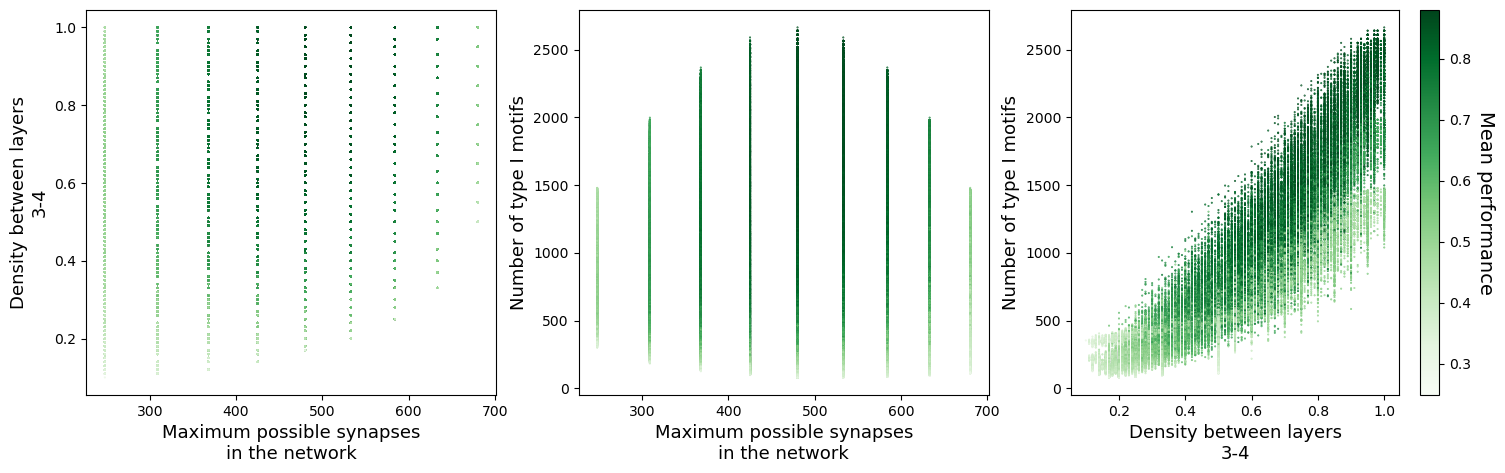

In [28]:
import itertools

i = 0
features = list(all_features_names[i].keys())
ind_c = int(np.ceil(len(features) / 3))
fig, axs = plt.subplots(1, len(features), figsize=(6 * len(features), 5), )
for j, (feature_name_a, feature_name_b) in enumerate(itertools.combinations(features, 2)):
    col = axs[j].scatter(all_features[i][feature_name_a], all_features[i][feature_name_b], s=0.2,
                         c=all_features[i]['label'], cmap='Greens')

    axs[j].set_xlabel(textwrap.fill(all_features_names[i][feature_name_a], width=25,
                                    break_long_words=False), fontsize=13)
    axs[j].set_ylabel(textwrap.fill(all_features_names[i][feature_name_b], width=25,
                                    break_long_words=False), fontsize=13)
cbar = fig.figure.colorbar(col)
cbar.ax.set_ylabel('Mean performance', rotation=-90, va="bottom", fontsize=14)
plt.savefig(
    f"{plot_path}/{time_str}_{tasks[i]}_2_features.png", bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

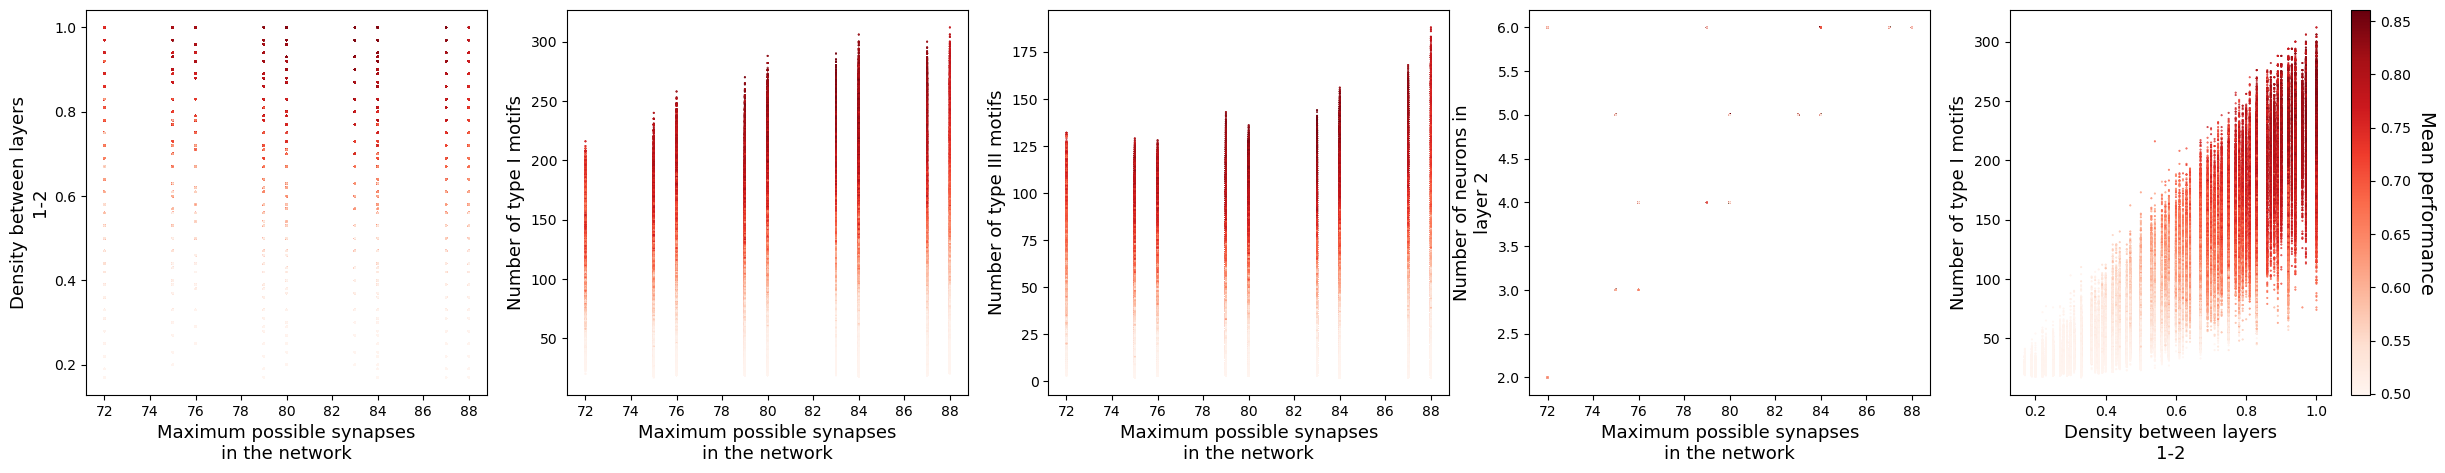

<Figure size 640x480 with 0 Axes>

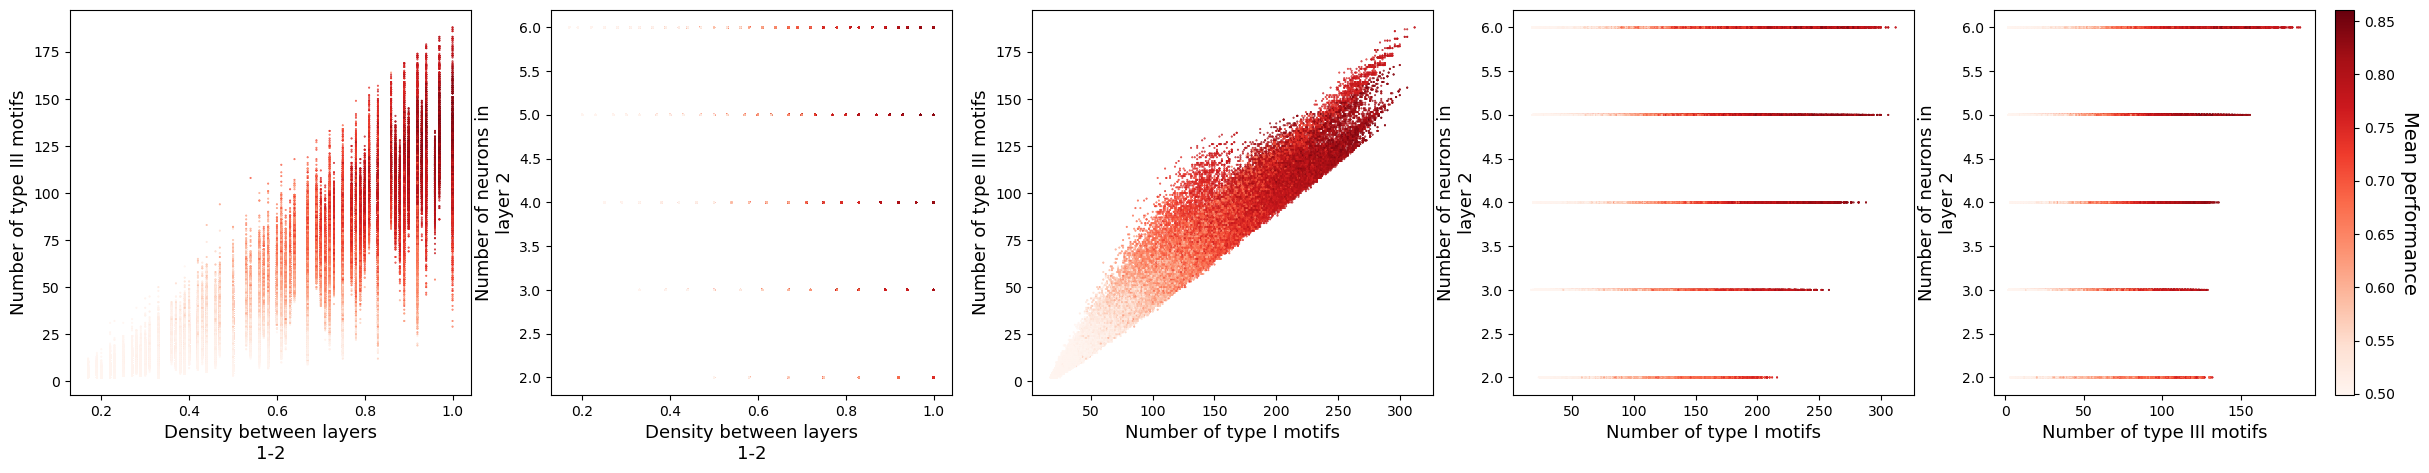

In [34]:

i = 1
features = list(all_features_names[i].keys())
ind_c = int(np.ceil(len(features) / 3))
all_comb = list(itertools.combinations(features, 2))
all_comb_2 = [all_comb[:6], all_comb[6:]]
for all_comb in all_comb_2:
    t = 0
    plt.figure()
    fig, axs = plt.subplots(1, len(all_comb), figsize=(6 * len(all_comb), 5), )
    for j, (feature_name_a, feature_name_b) in enumerate(all_comb):
        col = axs[j].scatter(all_features[i][feature_name_a], all_features[i][feature_name_b], s=0.2,
                             c=all_features[i]['label'], cmap='Reds')

        axs[j].set_xlabel(textwrap.fill(all_features_names[i][feature_name_a], width=25,
                                        break_long_words=False), fontsize=13)
        axs[j].set_ylabel(textwrap.fill(all_features_names[i][feature_name_b], width=25,
                                        break_long_words=False), fontsize=13)
    cbar = fig.figure.colorbar(col)
    cbar.ax.set_ylabel('Mean performance', rotation=-90, va="bottom", fontsize=14)
    t += 1
    plt.savefig(
        f"{plot_path}/{time_str}_{tasks[i]}_2_features_{t}.png", bbox_inches='tight')


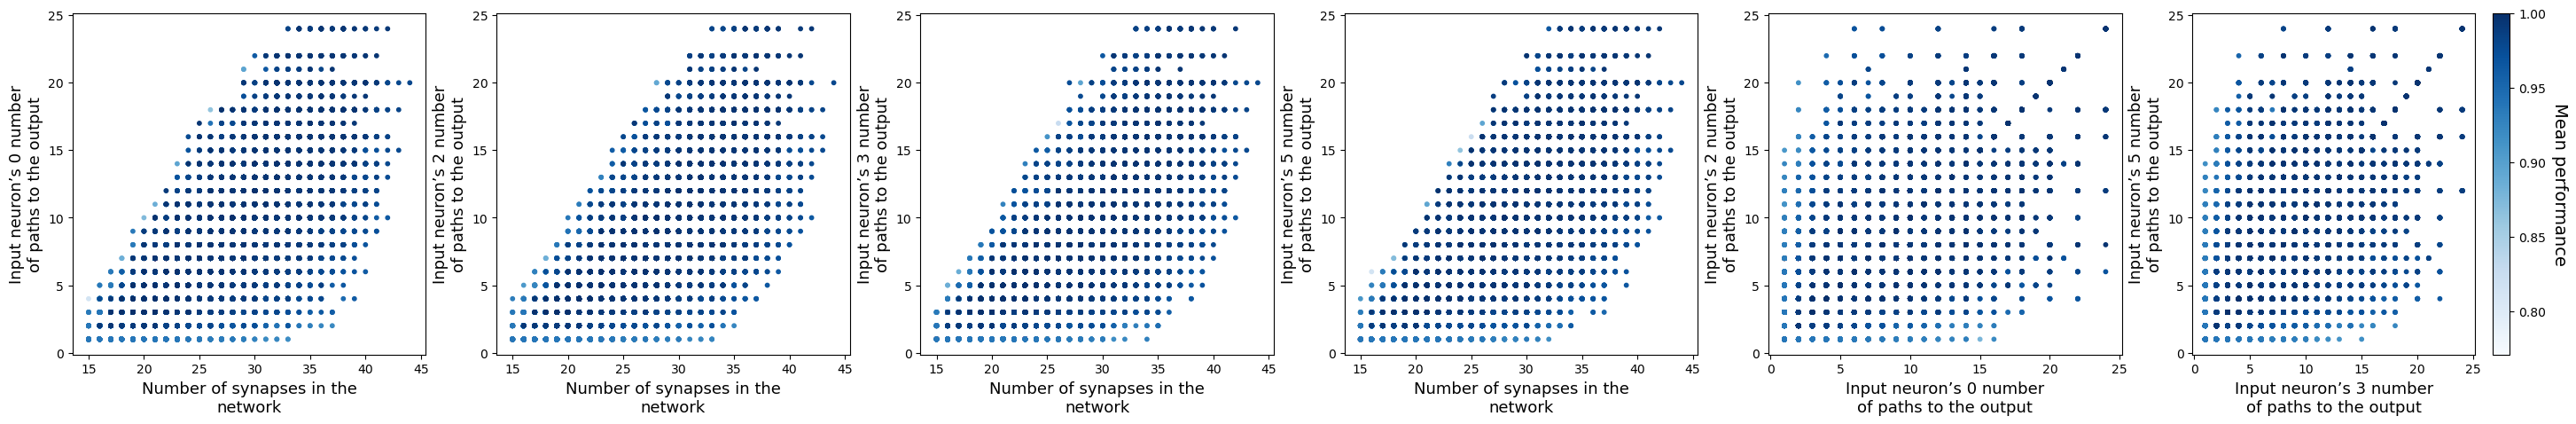

In [52]:
i = 2
features = list(all_features_names[i].keys())
all_comb = [
     ('num_connections', 'num_paths_to_output_per_input_neuron_(0_ 0)'),
 ('num_connections', 'num_paths_to_output_per_input_neuron_(0_ 2)'),
 ('num_connections', 'num_paths_to_output_per_input_neuron_(0_ 3)'),
 ('num_connections', 'num_paths_to_output_per_input_neuron_(0_ 5)'),
     ('num_paths_to_output_per_input_neuron_(0_ 0)',
  'num_paths_to_output_per_input_neuron_(0_ 2)'),
         ('num_paths_to_output_per_input_neuron_(0_ 3)',
  'num_paths_to_output_per_input_neuron_(0_ 5)'),
]

fig, axs = plt.subplots(1, len(all_comb), figsize=(6 * len(all_comb), 5), )
all_features[i]=all_features[i].sort_values('label')
for j, (feature_name_a, feature_name_b) in enumerate(all_comb):
    col = axs[j].scatter(all_features[i][feature_name_a], all_features[i][feature_name_b], s=10,
                         c=all_features[i]['label'], cmap='Blues')

    axs[j].set_xlabel(textwrap.fill(all_features_names[i][feature_name_a], width=25,
                                    break_long_words=False), fontsize=13)
    axs[j].set_ylabel(textwrap.fill(all_features_names[i][feature_name_b], width=25,
                                    break_long_words=False), fontsize=13)
cbar = fig.figure.colorbar(col)
cbar.ax.set_ylabel('Mean performance', rotation=-90, va="bottom", fontsize=14)
plt.savefig(
    f"{plot_path}/{time_str}_{tasks[i]}_2_features.png", bbox_inches='tight')

In [51]:
plt.rcParams['lines.markersize']

6.0

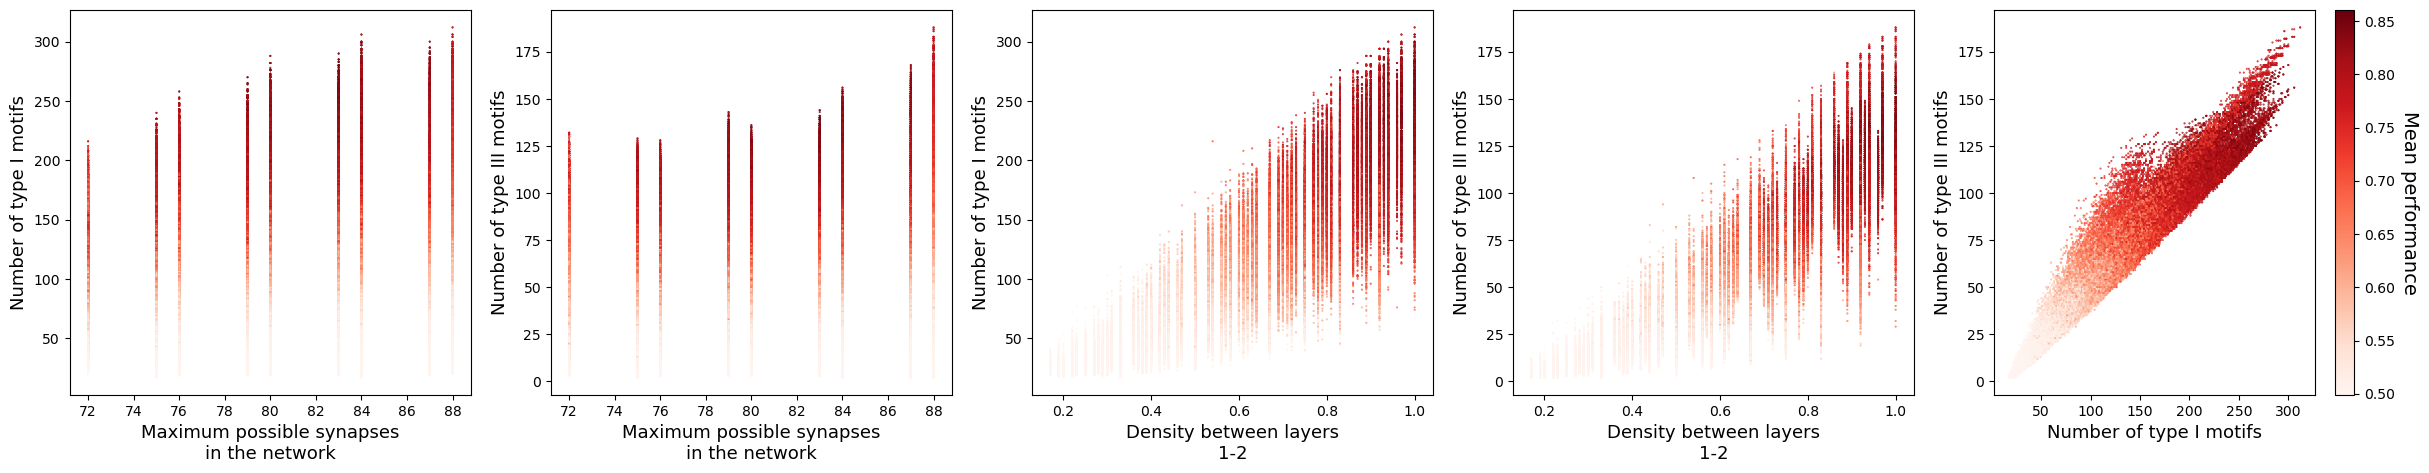

In [36]:
list(itertools.combinations(features, 2))

i = 1
features = list(all_features_names[i].keys())
ind_c = int(np.ceil(len(features) / 3))
all_comb = [
 ('max_possible_connections', 'motifs_count_1'),
 ('max_possible_connections', 'motifs_count_0'),

 ('total_connectivity_ratio_between_layers_0', 'motifs_count_1'),
 ('total_connectivity_ratio_between_layers_0', 'motifs_count_0'),
 ('motifs_count_1', 'motifs_count_0'),
]
fig, axs = plt.subplots(1, len(all_comb), figsize=(6 * len(all_comb), 5), )
for j, (feature_name_a, feature_name_b) in enumerate(all_comb):
    col = axs[j].scatter(all_features[i][feature_name_a], all_features[i][feature_name_b], s=0.2,
                         c=all_features[i]['label'], cmap='Reds')

    axs[j].set_xlabel(textwrap.fill(all_features_names[i][feature_name_a], width=25,
                                    break_long_words=False), fontsize=13)
    axs[j].set_ylabel(textwrap.fill(all_features_names[i][feature_name_b], width=25,
                                    break_long_words=False), fontsize=13)
cbar = fig.figure.colorbar(col)
cbar.ax.set_ylabel('Mean performance', rotation=-90, va="bottom", fontsize=14)

plt.savefig(
    f"{plot_path}/{time_str}_{tasks[i]}_2_features.png", bbox_inches='tight')


In [61]:
 for file_name in os.listdir(retina_lgb_res_path):
    if 'num_features_uniq_decay.csv' not in file_name:
        continue
    df = pd.read_csv(f"{retina_lgb_res_path}/{file_name}")

In [62]:
df2 = df[df["rounding_ratio"] == 4][df["num_features"] <= 30].sort_values("num_features")
df2

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_1129/489999486.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[df["rounding_ratio"] == 4][df["num_features"] <= 30].sort_values("num_features")


Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
9            9        23             1               4       0.000
27          27       383             2               4       0.008
69          69      3608             3               4       0.072
63          63     17038             4               4       0.342
21          21     33124             5               4       0.665
33          33     38299             6               4       0.769
3            3     43864             7               4       0.880
39          39     45224             8               4       0.908
57          57     46123             9               4       0.926
87          87     46684            10               4       0.937
75          75     49085            20               4       0.985
15          15     49712            30               4       0.998

In [2]:
49823 / 46684

1.0672393111130152

In [63]:
dfs = []
paths = [
    retina_lgb_res_path,
    xor_lgb_res_path,
    digit_lgb_res_path,

]
num_n = [49823,
         103328,
         96726,
         ]
for p, n in zip(paths, num_n):
    for file_name in os.listdir(p):
        if 'num_features_uniq_decay.csv' not in file_name:
            continue
        df = pd.read_csv(f"{p}/{file_name}")
        df["opp_ration"] = (1 / df['num_rows']) * 100
        df = df[df["rounding_ratio"] == 6].sort_values("num_features")
        dfs.append(df)

In [64]:

for file_name in os.listdir(retina_lgb_res_path):
    if 'num_features_uniq_decay.csv' not in file_name:
        continue
    ret = pd.read_csv(f"{retina_lgb_res_path}/{file_name}")

In [65]:
ret

Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
0             0     49823             7              -1        1.00
1             1     43864             7               2        0.88
2             2     43864             7               3        0.88
3             3     43864             7               4        0.88
4             4     43864             7               5        0.88
..          ...       ...           ...             ...         ...
97           97     49800            40               2        1.00
98           98     49800            40               3        1.00
99           99     49800            40               4        1.00
100         100     49800            40               5        1.00
101         101     49800            40               6        1.00

[102 rows x 5 columns]

In [66]:
49823 / 46684

1.0672393111130152

In [67]:
2166 / 49823 * 100

4.347389759749514

In [68]:
(1 / 46684) * 100

0.0021420615200068546

In [69]:
(1 / 23) * 100


4.3478260869565215

In [1]:
dfs[1]

NameError: name 'dfs' is not defined

In [71]:
dfs[1]['opp_ration'][dfs[1]['num_features'] == 1].item() / dfs[1]['opp_ration'][dfs[1]['num_features'] == 10].item()

356.50349650349654

In [72]:
dfs[2]['opp_ration'][dfs[2]['num_features'] == 1].item() / dfs[2]['opp_ration'][dfs[2]['num_features'] == 10].item()


39.320423970648186

In [73]:
dfs[0]['opp_ration'][dfs[0]['num_features'] == 1].item() / dfs[0]['opp_ration'][dfs[0]['num_features'] == 10].item()


2029.7391304347825

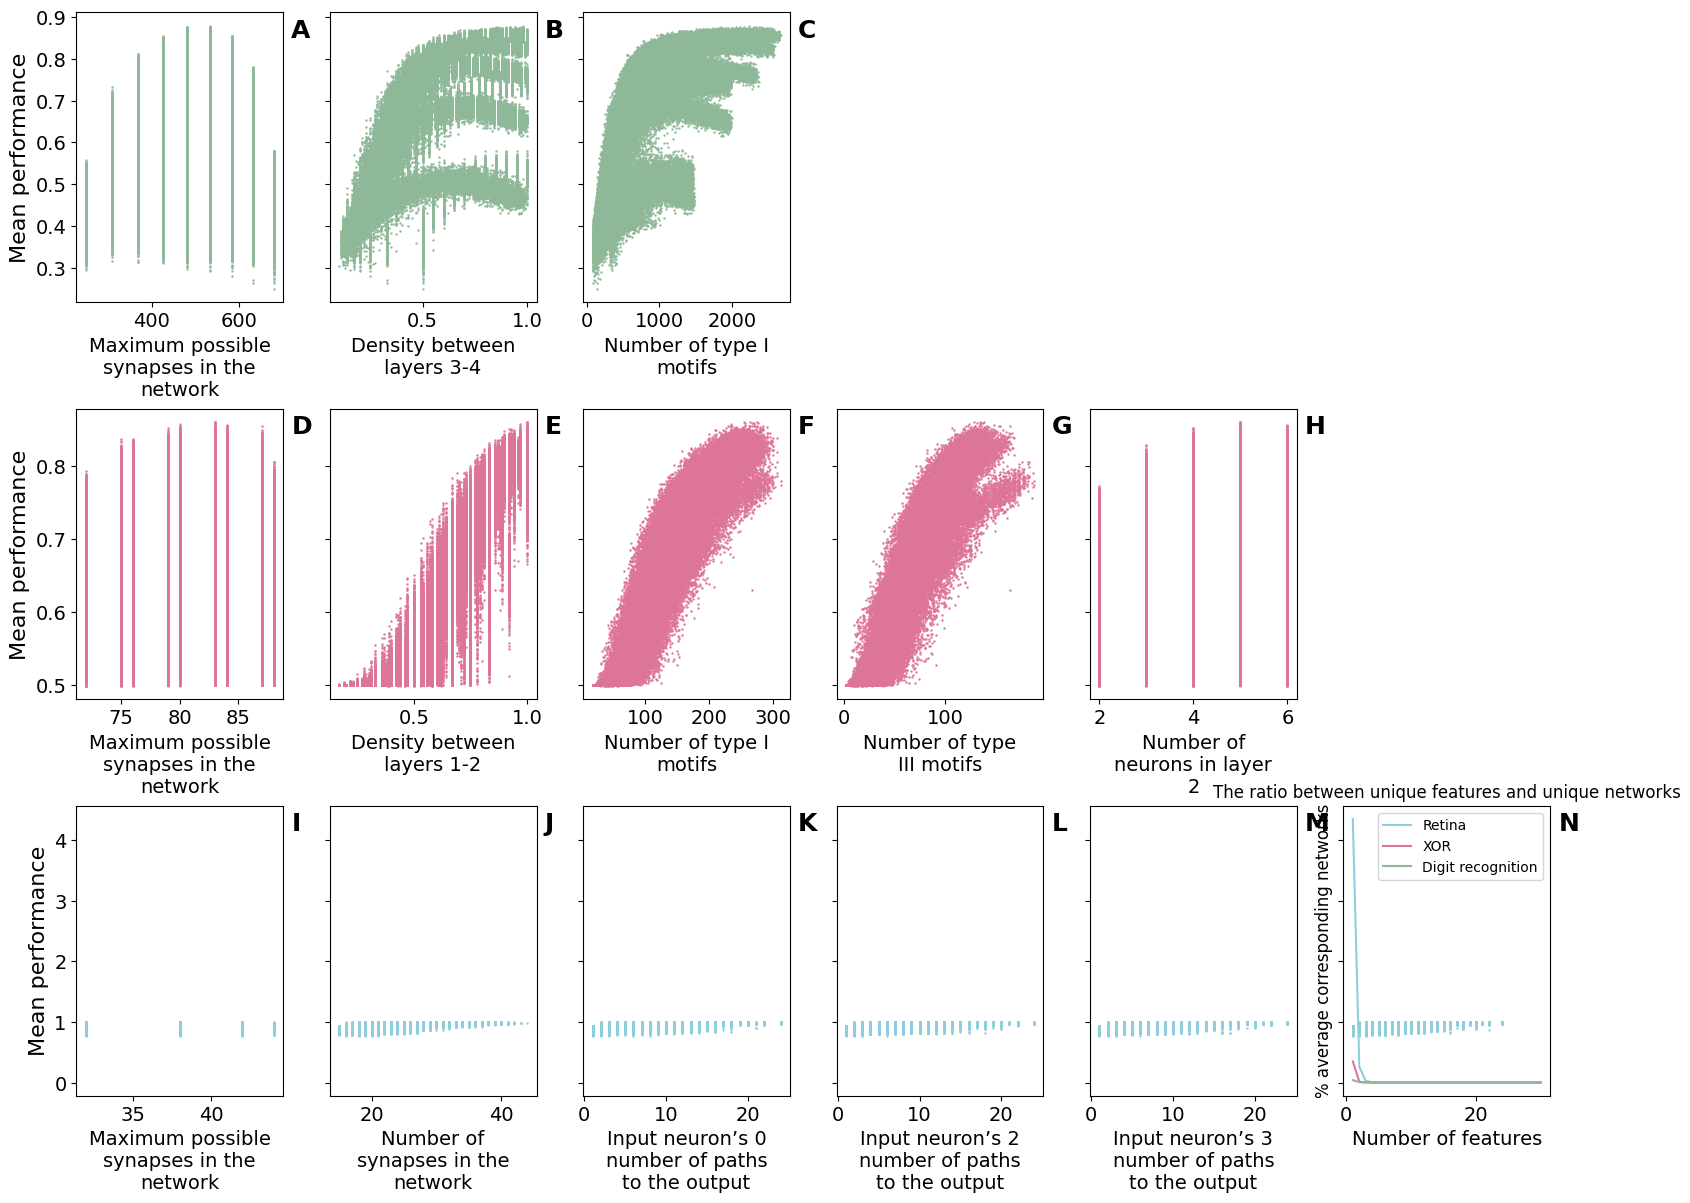

In [74]:
cs = [
    "#8ECDDD", COLORS[2], COLORS[3],
]
tasks = ['Retina', 'XOR', 'Digit recognition']
nms = [6, 5, 3]
for i in range(len(tasks)):
    df = dfs[i][dfs[i]['num_features'] <= 30]
    ns = df["num_features"]
    if tasks[i] == 'Digit recognition':
        df = dfs[i][dfs[i]['num_features'] <= 50]
        ns = df["num_features"].tolist()
        ns[-1] = 30
    plt.plot(ns, df["opp_ration"], c=cs[i], label=tasks[i])
    #plt.vlines(x=nms[i], ymax=1, ymin=0, colors=cs[i],linestyles='--', alpha=0.5)
plt.xlabel('Number of features')
plt.ylabel(textwrap.fill('% average corresponding networks', width=40,
                         break_long_words=False), fontsize=12)
plt.title("The ratio between unique features and unique networks")
plt.legend()
plt.savefig(
    f"{plot_path}/{time_str}_unique_features_ops_ratio.png", )
plt.show()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_1129/954634637.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = dfs[i][dfs[i]['num_features'] <= 20][dfs[i]['num_features'] > 2]
/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_1129/954634637.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = dfs[i][dfs[i]['num_features'] <= 50][dfs[i]['num_features'] > 2]


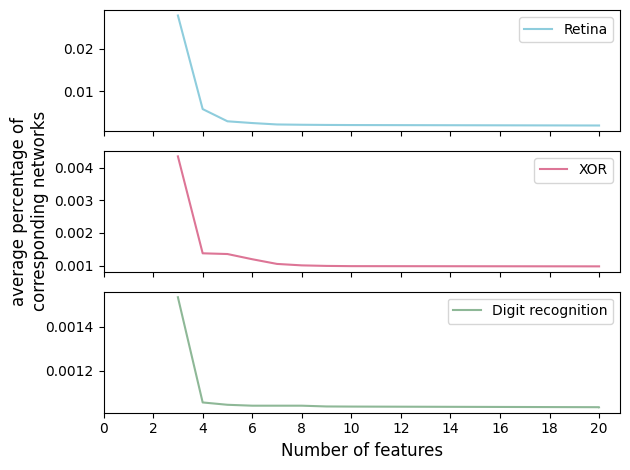

In [78]:
fig, ax = plt.subplots(3, 1, sharex='all')
cs = [
    "#8ECDDD", COLORS[2], COLORS[3],
]
tasks = ['Retina', 'XOR', 'Digit recognition']
nms = [6, 5, 3]
for i in range(len(tasks)):
    df = dfs[i][dfs[i]['num_features'] <= 20][dfs[i]['num_features'] > 2]
    ns = df["num_features"]
    if tasks[i] == 'Digit recognition':
        df = dfs[i][dfs[i]['num_features'] <= 50][dfs[i]['num_features'] > 2]
        ns = df["num_features"].tolist()
        ns[-1] = 20
    ax[i].plot(ns, df["opp_ration"], c=cs[i], label=tasks[i])
    ax[i].legend()
    #plt.vlines(x=nms[i], ymax=1, ymin=0, colors=cs[i],linestyles='--', alpha=0.5)
ax[2].set_xlabel('Number of features', fontsize=12)
ax[2].set_xticks(range(0, 21, 2))
ax[1].set_ylabel('average percentage of\ncorresponding networks', fontsize=12)
#plt.title("The ratio between unique features and unique networks")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_unique_features_ops_ratio.png", )
plt.show()

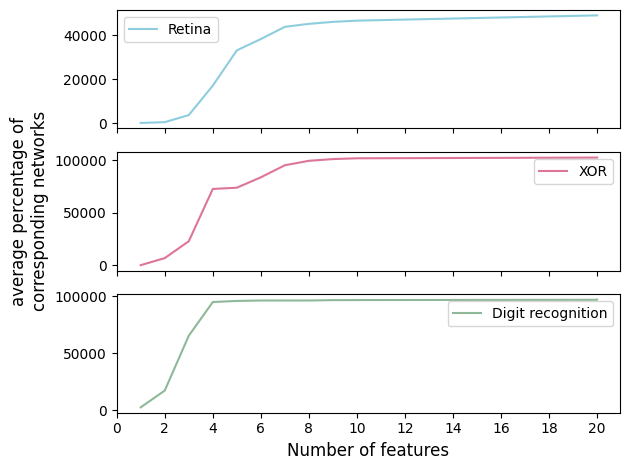

In [76]:
fig, ax = plt.subplots(3, 1, sharex='all')
cs = [
    "#8ECDDD", COLORS[2], COLORS[3],
]
tasks = ['Retina', 'XOR', 'Digit recognition']
nms = [6, 5, 3]
for i in range(len(tasks)):
    df = dfs[i][dfs[i]['num_features'] <= 20]
    ns = df["num_features"]
    if tasks[i] == 'Digit recognition':
        df = dfs[i][dfs[i]['num_features'] <= 50]
        ns = df["num_features"].tolist()
        ns[-1] = 20
    ax[i].plot(ns, df["num_rows"], c=cs[i], label=tasks[i])
    ax[i].legend()
    #plt.vlines(x=nms[i], ymax=1, ymin=0, colors=cs[i],linestyles='--', alpha=0.5)
ax[2].set_xlabel('Number of features', fontsize=12)
ax[2].set_xticks(range(0, 21, 2))
ax[1].set_ylabel('average percentage of\ncorresponding networks', fontsize=12)
#plt.title("The ratio between unique features and unique networks")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_unique_features_ops_ratio.png", )
plt.show()

In [231]:
for df, n in zip(dfs, [6, 5, 3]):
    print(df[df['num_features'] == 10])
    print(df[df['num_features'] == n])
    print(1 / df[df['num_features'] == 1]['size_ratio'])
    print(1 / df[df['num_features'] == 10]['size_ratio'])
    print(1 / df[df['num_features'] == n]['size_ratio'])

    Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
87          87     46684            10               4       0.937
    Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
33          33     38299             6               4       0.769
9    inf
Name: size_ratio, dtype: float64
87    1.067236
Name: size_ratio, dtype: float64
33    1.30039
Name: size_ratio, dtype: float64
   Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
9           9    101960            10               4       0.987
    Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
15          15     73980             5               4       0.716
81    333.333333
Name: size_ratio, dtype: float64
9    1.013171
Name: size_ratio, dtype: float64
15    1.396648
Name: size_ratio, dtype: float64
    Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
21          21     96453            10               4       0.997
   Unnamed: 0  num_rows  num_features  rounding_ra

In [232]:
for df, n in zip(dfs, [6, 5, 3]):
    print(1 / df[df['num_features'] == 1]['size_ratio'])
    print(1 / df[df['num_features'] == 10]['size_ratio'])
    print(1 / df[df['num_features'] == n]['size_ratio'])

9    inf
Name: size_ratio, dtype: float64
87    1.067236
Name: size_ratio, dtype: float64
33    1.30039
Name: size_ratio, dtype: float64
81    333.333333
Name: size_ratio, dtype: float64
9    1.013171
Name: size_ratio, dtype: float64
15    1.396648
Name: size_ratio, dtype: float64
33    40.0
Name: size_ratio, dtype: float64
21    1.003009
Name: size_ratio, dtype: float64
3    1.48368
Name: size_ratio, dtype: float64


In [233]:
dfs[0]

Unnamed: 0  num_rows  num_features  rounding_ratio  size_ratio
9            9        23             1               4       0.000
27          27       383             2               4       0.008
69          69      3608             3               4       0.072
63          63     17038             4               4       0.342
21          21     33124             5               4       0.665
33          33     38299             6               4       0.769
3            3     43864             7               4       0.880
39          39     45224             8               4       0.908
57          57     46123             9               4       0.926
87          87     46684            10               4       0.937
75          75     49085            20               4       0.985
15          15     49712            30               4       0.998
99          99     49800            40               4       1.000
93          93     49805            50               4       1.000
81          81     49817            60               4       1.000
51          51     49817            70               4       1.000
45          45     49817            72               4       1.000

In [185]:
task = "xor"
num_layers = "4"
xor_res_folder = f"{task}/{task}_{num_layers}_layers"
xor_lgb_res_path = f"{results_path}/{xor_res_folder}/lightgbm_feature_selection/"
xor_all_features_folder = 'exp_2023-11-16-17-38-02_nice_features'
plot_path = f"{local_base_path}/plots/all_togther"
task = "retina_xor"
num_layers = '3'
retina_res_folder = f"{task}/retina_{num_layers}_layers"
retina_lgb_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/"
retina_all_features_folder = 'exp_2023-11-27-15-51-15_nice_features'
task = "digits"
num_layers = '3'
digit_res_folder = f"{task}/digits_{num_layers}_layers"
digit_lgb_res_path = f"{results_path}/{digit_res_folder}/lightgbm_feature_selection/"
digit_all_features_folder = 'exp_2023_11_27_11_00_0_nice_features'


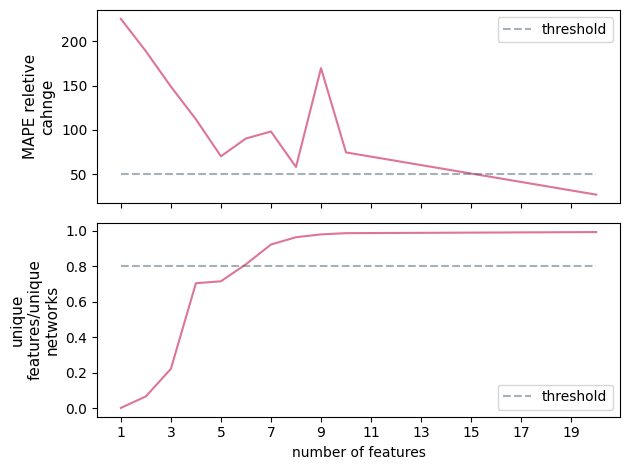

In [141]:
fig, axs = plt.subplots(2, 1, sharex='all', )
axs[0].plot(all_num_features_res['num_features'][all_num_features_res['num_features'] <= 20],
            all_num_features_res['mape_reletive_cahnge'][all_num_features_res['num_features'] <= 20] * 100,
            c=COLORS[2], )
axs[0].set_ylabel(textwrap.fill('MAPE reletive cahnge', width=15,
                                break_long_words=False), fontsize=11)
axs[0].hlines(y=50, xmin=1, xmax=20, colors=semi_balck, linestyles='--', alpha=0.5, label='threshold')
axs[0].legend()
axs[1].plot(dfs[1]['num_features'][dfs[1]['num_features'] <= 20], dfs[1]['size_ratio'][dfs[1]['num_features'] <= 20],
            c=COLORS[2])
axs[1].set_ylabel(textwrap.fill('unique features/unique networks', width=15,
                                break_long_words=False), fontsize=11)
axs[1].hlines(y=0.8, xmin=1, xmax=20, colors=semi_balck, linestyles='--', alpha=0.5, label='threshold')

axs[1].legend(loc='lower right')
axs[1].set_xlabel('number of features')
plt.xticks(range(1, 21, 2))
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7f91993136d0>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(9, 0, '9'),
  Text(11, 0, '11'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17'),
  Text(19, 0, '19')])

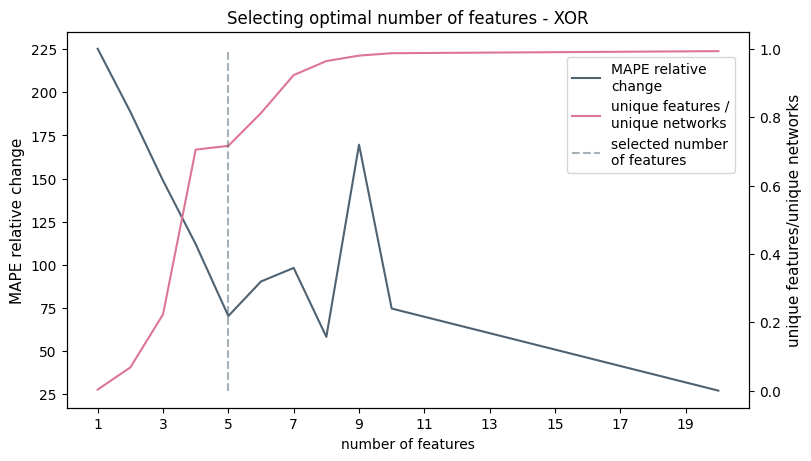

In [184]:
fig, ax = plt.subplots(figsize=(8, 4.5), layout='constrained', )
ax.plot(all_num_features_res['num_features'][all_num_features_res['num_features'] <= 20],
        all_num_features_res['mape_reletive_cahnge'][all_num_features_res['num_features'] <= 20] * 100, c=COLORS[0],
        label=textwrap.fill('MAPE relative change', width=15,
                            break_long_words=False))

#ax.hlines(y=50, xmin=1, xmax=20, colors=COLORS[0],linestyles='--', alpha=0.5,
#         label= textwrap.fill('MAPE relative change threshold', width=15,
#                                   break_long_words=False))
ax2 = ax.twinx()
ax2.plot(dfs[1]['num_features'][dfs[1]['num_features'] <= 20], dfs[1]['size_ratio'][dfs[1]['num_features'] <= 20],
         COLORS[2],
         label=textwrap.fill('unique features / unique networks', width=20,
                             break_long_words=False))

#plt.hlines(y=0.8, xmin=1, xmax=20, colors=COLORS[2],linestyles='--', alpha=0.5,
#                              label= textwrap.fill('unique features/unique networks ratio', width=15,
#                                  break_long_words=False))
ax.set_ylabel(textwrap.fill('MAPE relative change', width=35,
                            break_long_words=False), fontsize=11)
ax2.set_ylabel(textwrap.fill('unique features/unique networks', width=35,
                             break_long_words=False), fontsize=11)
ax2.vlines(x=5, ymax=1, ymin=0, colors=semi_balck, linestyles='--', alpha=0.5, label='selected number\nof features')
ax.set_xlabel('number of features')
#fig.legend( bbox_to_anchor=(0.45, 0., 0.5, 0.65))
fig.legend(loc='upper right', bbox_to_anchor=(0.42, 0., 0.5, 0.90))
plt.title('Selecting optimal number of features - XOR')
plt.xticks(range(1, 21, 2))


In [201]:
res = {
}
all_features_res = {}
for task_dir, task, all_f in zip([retina_lgb_res_path, xor_lgb_res_path, digit_lgb_res_path],
                                 ['retina', "xor", 'digits', ],
                                 [retina_all_features_folder, xor_all_features_folder, digit_all_features_folder]):
    df = pd.DataFrame()
    for file in os.listdir(f'{task_dir}/{all_f}'):
        if '._' in file:
            continue
        if 'all_exp_mape_prediction_results' not in file:
            continue
        all_features_res[task] = pd.read_csv(f'{task_dir}/{all_f}/{file}')



In [190]:
task

'retina'

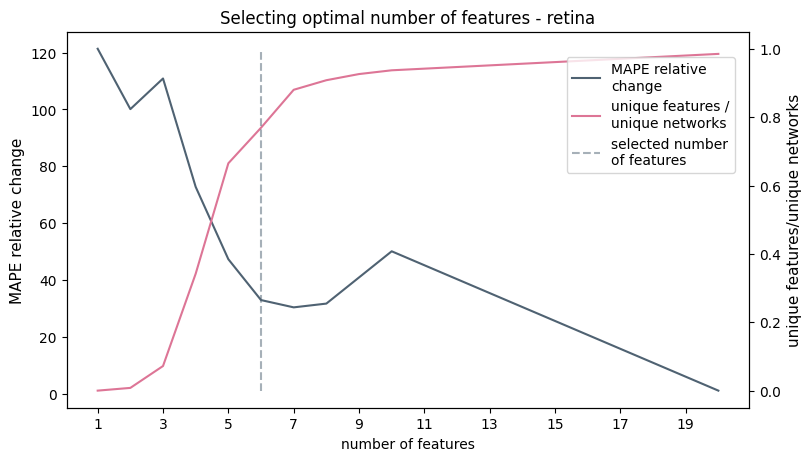

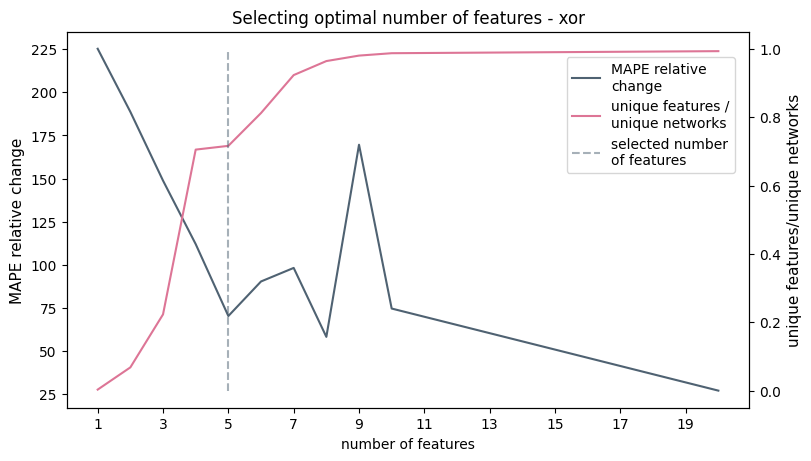

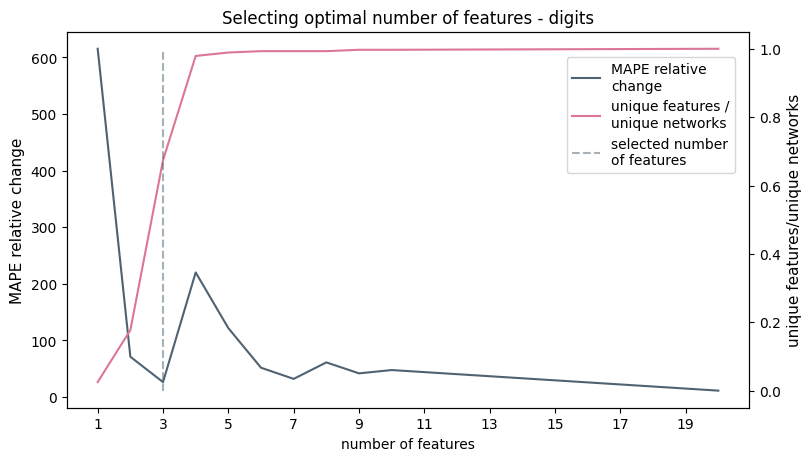

In [192]:
for i, (task, n) in enumerate(zip(['retina', "xor", 'digits', ], [6, 5, 3, ])):
    fig, ax = plt.subplots(figsize=(8, 4.5), layout='constrained', )
    all_features_res[task]['mape_reletive_cahnge'] = (all_features_res[task][
                                                          'test mape ind'] - all_features_res[task][
                                                          'test mape ind'].min()) / all_features_res[task][
                                                         'test mape ind'].min()

    ax.plot(all_features_res[task]['num_features'][all_features_res[task]['num_features'] <= 20],
            all_features_res[task]['mape_reletive_cahnge'][all_features_res[task]['num_features'] <= 20] * 100,
            c=COLORS[0],
            label=textwrap.fill('MAPE relative change', width=15,
                                break_long_words=False))

    ax2 = ax.twinx()
    ax2.plot(dfs[i]['num_features'][dfs[i]['num_features'] <= 20], dfs[i]['size_ratio'][dfs[i]['num_features'] <= 20],
             COLORS[2],
             label=textwrap.fill('unique features / unique networks', width=20,
                                 break_long_words=False))

    ax.set_ylabel(textwrap.fill('MAPE relative change', width=35,
                                break_long_words=False), fontsize=11)
    ax2.set_ylabel(textwrap.fill('unique features/unique networks', width=35,
                                 break_long_words=False), fontsize=11)
    ax2.vlines(x=n, ymax=1, ymin=0, colors=semi_balck, linestyles='--', alpha=0.5, label='selected number\nof features')
    ax.set_xlabel('number of features')

    fig.legend(loc='upper right', bbox_to_anchor=(0.42, 0., 0.5, 0.90))
    plt.title(f'Selecting optimal number of features - {task}')
    plt.xticks(range(1, 21, 2))


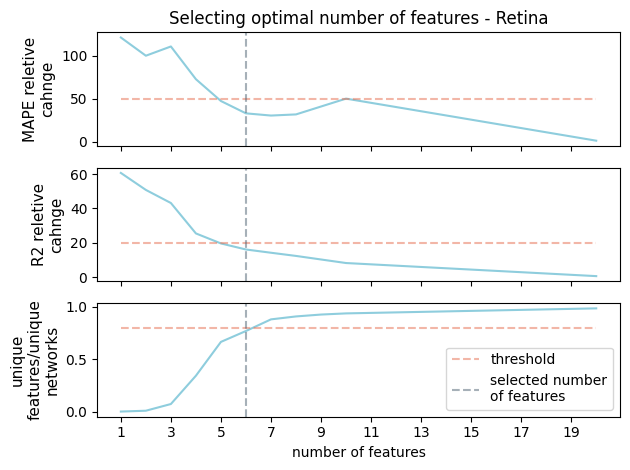

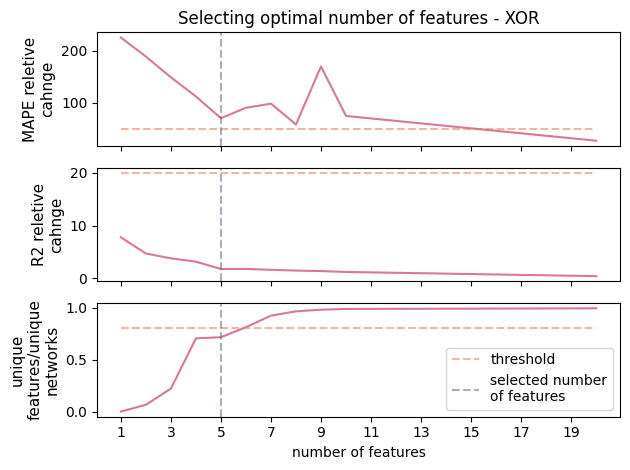

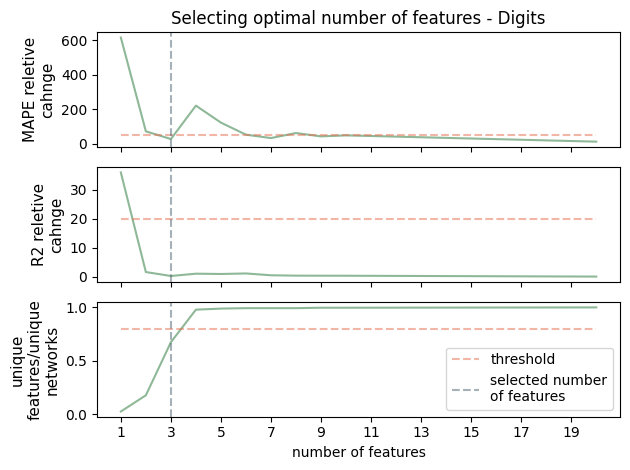

In [225]:
cs = [
    "#8ECDDD", COLORS[2], COLORS[3],
]
for i, (task, n, c) in enumerate(zip(['retina', "xor", 'digits', ], [6, 5, 3, ], cs)):
    fig, axs = plt.subplots(3, 1, sharex='all', )
    all_features_res[task]['mape_reletive_cahnge'] = ((all_features_res[task][
                                                           'test mape ind'] - all_features_res[task][
                                                           'test mape ind'].min()) / all_features_res[task][
                                                          'test mape ind'].min()) * 100

    all_features_res[task]['r2_reletive_cahnge'] = ((all_features_res[task]['best r2 test'].max() -
                                                     all_features_res[task][
                                                         'best r2 test']) / all_features_res[task][
                                                        'best r2 test'].max()) * 100
    axs[0].plot(all_features_res[task]['num_features'][all_features_res[task]['num_features'] <= 20],
                all_features_res[task]['mape_reletive_cahnge'][all_features_res[task]['num_features'] <= 20], c=c, )
    axs[0].set_ylabel(textwrap.fill('MAPE reletive cahnge', width=15,
                                    break_long_words=False), fontsize=11)
    axs[0].hlines(y=50, xmin=1, xmax=20, colors=COLORS[5], linestyles='--', alpha=0.5, label='threshold')
    ymin, ymax = axs[0].set_ylim()
    axs[0].vlines(x=n, ymin=ymin, ymax=ymax, colors=semi_balck, linestyles='--', alpha=0.5,
                  label='selected number\nof features')

    #axs[0].legend()
    axs[1].plot(all_features_res[task]['num_features'][all_features_res[task]['num_features'] <= 20],
                all_features_res[task]['r2_reletive_cahnge'][all_features_res[task]['num_features'] <= 20], c=c, )
    axs[1].set_ylabel(textwrap.fill('R2 reletive cahnge', width=15,
                                    break_long_words=False), fontsize=11)
    axs[1].hlines(y=20, xmin=1, xmax=20, colors=COLORS[5], linestyles='--', alpha=0.5, label='threshold')
    ymin, ymax = axs[1].set_ylim()
    axs[1].vlines(x=n, ymin=ymin, ymax=ymax, colors=semi_balck, linestyles='--', alpha=0.5,
                  label='selected number\nof features')

    axs[2].plot(dfs[i]['num_features'][dfs[i]['num_features'] <= 20],
                dfs[i]['size_ratio'][dfs[i]['num_features'] <= 20], c=c)
    axs[2].set_ylabel(textwrap.fill('unique features/unique networks', width=15,
                                    break_long_words=False), fontsize=11)
    axs[2].hlines(y=0.8, xmin=1, xmax=20, colors=COLORS[5], linestyles='--', alpha=0.5, label='threshold')
    ymin, ymax = axs[2].set_ylim()
    axs[2].vlines(x=n, ymin=ymin, ymax=ymax, colors=semi_balck, linestyles='--', alpha=0.5,
                  label='selected number\nof features')

    axs[2].legend(loc='lower right')
    axs[2].set_xlabel('number of features')
    t = task.capitalize()

    if task == 'xor':
        t = task.upper()
    axs[0].set_title(f'Selecting optimal number of features - {t}')
    plt.xticks(range(1, 21, 2))
    plt.tight_layout()
    plt.savefig(
        f"{plot_path}/{time_str}_select_num_features_{task}.png", )

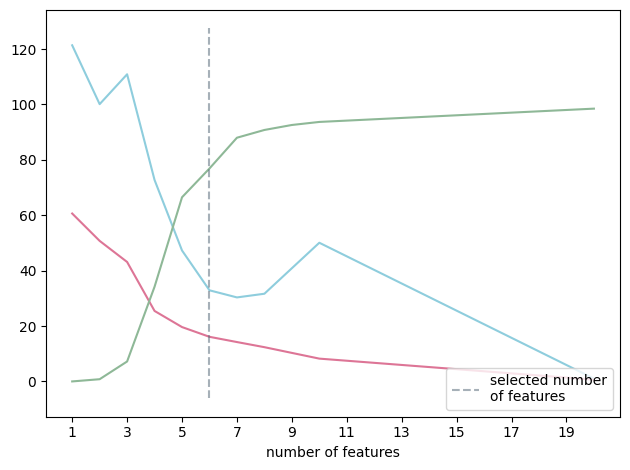

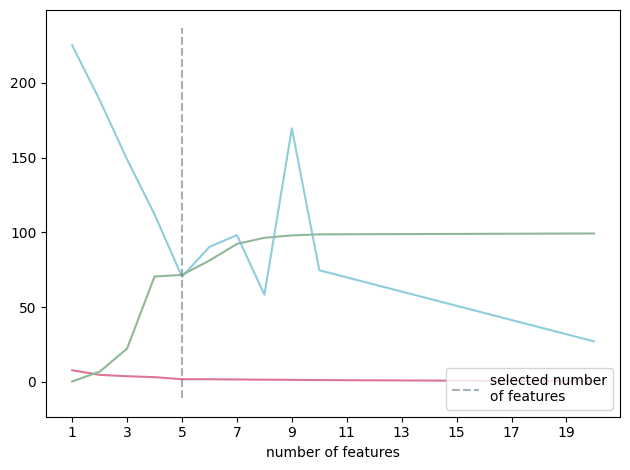

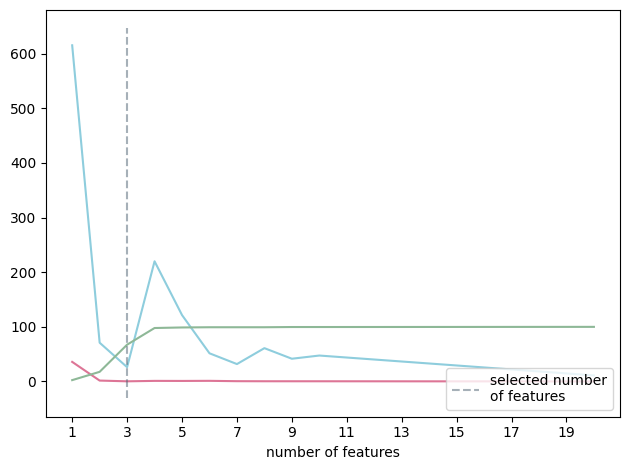

In [224]:
cs = [
    "#8ECDDD", COLORS[2], COLORS[3],
]
for i, (task, n, c) in enumerate(zip(['retina', "xor", 'digits', ], [6, 5, 3, ], cs)):
    plt.figure()
    all_features_res[task]['mape_reletive_cahnge'] = ((all_features_res[task][
                                                           'test mape ind'] - all_features_res[task][
                                                           'test mape ind'].min()) / all_features_res[task][
                                                          'test mape ind'].min()) * 100

    all_features_res[task]['r2_reletive_cahnge'] = ((all_features_res[task]['best r2 test'].max() -
                                                     all_features_res[task][
                                                         'best r2 test']) / all_features_res[task][
                                                        'best r2 test'].max()) * 100
    plt.plot(all_features_res[task]['num_features'][all_features_res[task]['num_features'] <= 20],
             all_features_res[task]['mape_reletive_cahnge'][all_features_res[task]['num_features'] <= 20], c=cs[0], )
    plt.plot(all_features_res[task]['num_features'][all_features_res[task]['num_features'] <= 20],
             all_features_res[task]['r2_reletive_cahnge'][all_features_res[task]['num_features'] <= 20], c=cs[1], )

    plt.plot(dfs[i]['num_features'][dfs[i]['num_features'] <= 20],
             dfs[i]['size_ratio'][dfs[i]['num_features'] <= 20] * 100, c=cs[2])
    ymin, ymax = plt.ylim()
    plt.vlines(x=n, ymin=ymin, ymax=ymax, colors=semi_balck, linestyles='--', alpha=0.5,
               label='selected number\nof features')

    plt.legend(loc='lower right')
    plt.xlabel('number of features')
    t = task.capitalize()

    if task == 'xor':
        t = task.upper()
    axs[0].set_title(f'Selecting optimal number of features - {t}')
    plt.xticks(range(1, 21, 2))
    plt.tight_layout()
